In [ ]:
import cv2 as cv
import os
from tqdm import tqdm
from google.colab.patches import cv2_imshow

In [ ]:
img_path = "drive/MyDrive/leaf data/images"
mask_path = "drive/MyDrive/leaf data/masks"

In [ ]:
_,_,files = next(os.walk(img_path))
print(files)
_,_,masks = next(os.walk(mask_path))
print(masks)

['00037.jpg', '00082.jpg', '00033.jpg', '00118.jpg', '00043.jpg', '00140.jpg', '00126.jpg', '00149.jpg', '00055.jpg', '00011.jpg', '00028.jpg', '00153.jpg', '00150.jpg', '00096.jpg', '00128.jpg', '00003.jpg', '00013.jpg', '00061.jpg', '00023.jpg', '00024.jpg', '00054.jpg', '00131.jpg', '00076.jpg', '00095.jpg', '00049.jpg', '00017.jpg', '00044.jpg', '00084.jpg', '00020.jpg', '00116.jpg', '00092.jpg', '00132.jpg', '00146.jpg', '00107.jpg', '00050.jpg', '00067.jpg', '00141.jpg', '00039.jpg', '00130.jpg', '00102.jpg', '00034.jpg', '00035.jpg', '00053.jpg', '00077.jpg', '00123.jpg', '00056.jpg', '00081.jpg', '00031.jpg', '00036.jpg', '00027.jpg', '00138.jpg', '00103.jpg', '00125.jpg', '00025.jpg', '00057.jpg', '00062.jpg', '00026.jpg', '00010.jpg', '00052.jpg', '00088.jpg', '00006.jpg', '00099.jpg', '00144.jpg', '00136.jpg', '00137.jpg', '00080.jpg', '00090.jpg', '00135.jpg', '00152.jpg', '00074.jpg', '00105.jpg', '00087.jpg', '00045.jpg', '00089.jpg', '00063.jpg', '00148.jpg', '00154.jpg'

In [ ]:
os.mkdir("drive/MyDrive/leaf data/preprocessed")
os.mkdir("drive/MyDrive/leaf data/preprocessed/images/")
os.mkdir("drive/MyDrive/leaf data/preprocessed/masks/")


In [ ]:
for i in tqdm(range(len(files))):
    img = cv.imread(os.path.join(img_path,files[i]))
    mask = cv.imread(os.path.join(mask_path,files[i].replace('.jpg','.png')))
    ipath = "drive/MyDrive/leaf data/preprocessed/images/"+str(i)+'.jpg'
    mpath = "drive/MyDrive/leaf data/preprocessed/masks/"+str(i)+'.jpg'
    cv.imwrite(ipath,cv.resize(img,(256,256)))
    cv.imwrite(mpath,cv.resize(mask,(256,256)))

100%|██████████| 588/588 [05:55<00:00,  1.66it/s]


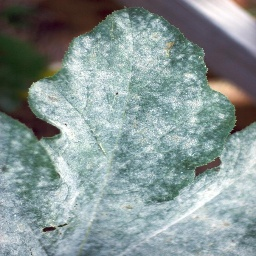

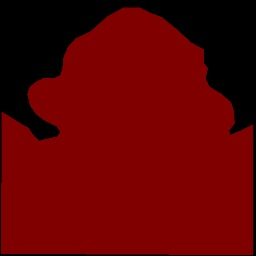

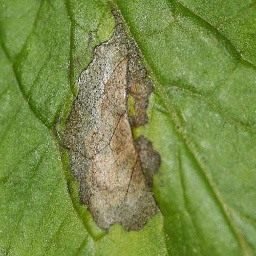

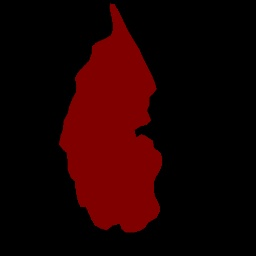

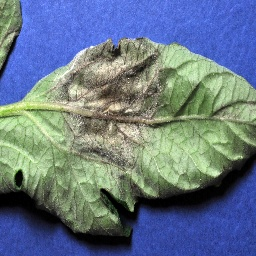

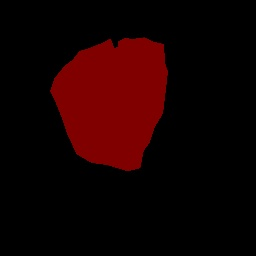

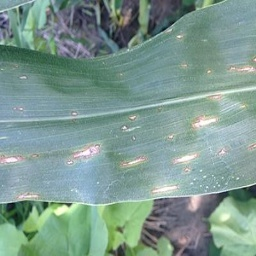

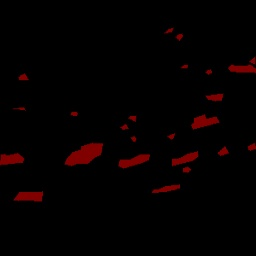

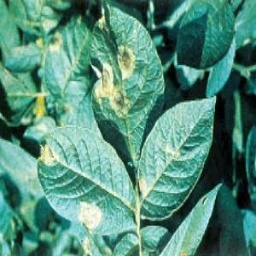

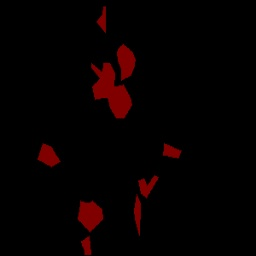

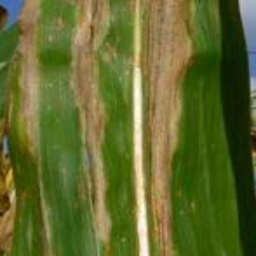

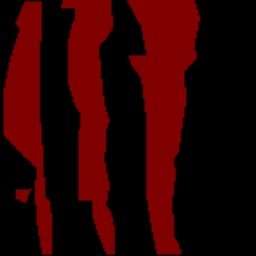

In [ ]:
paths = [20,100,150,300,400,500]
for i in paths:
    img = "drive/MyDrive/leaf data/preprocessed/images/"+str(i)+'.jpg'
    mask = "drive/MyDrive/leaf data/preprocessed/masks/"+str(i)+'.jpg'
    cv2_imshow(cv.imread(img))
    cv2_imshow(cv.imread(mask))

In [ ]:
pre_processed_mask = "drive/MyDrive/leaf data/preprocessed/masks/"
pre_processed_img = "drive/MyDrive/leaf data/preprocessed/images/"

In [ ]:
for mask_p in tqdm(next(os.walk(pre_processed_mask))[2]):
    mask = cv.imread(os.path.join(pre_processed_mask,mask_p))
    gray = cv.cvtColor(mask, cv.COLOR_RGB2GRAY)
    _, new_mask = cv.threshold(gray, 1, 1, cv.THRESH_BINARY)
    cv.imwrite(os.path.join(pre_processed_mask,mask_p),new_mask)

100%|██████████| 588/588 [00:13<00:00, 45.09it/s]


In [ ]:
i = 0
for mask_p in tqdm(next(os.walk(pre_processed_mask))[2]):
    mask = cv.imread(os.path.join(pre_processed_mask,mask_p),0)
    print(mask.shape)
    i+=1
    if i==10:
        break
    print(set(mask.flatten()))